In [ ]:
project_path = "/content/drive/MyDrive/GitHub/eda-human-proteome"
data_path = project_path + "/data/sample_uniprot_100.tsv"

In [ ]:
# Display basic information

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default plot style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Define path to the UniProt TSV file
data_path = data_path

# Load the dataset
df = pd.read_csv(data_path, sep='\t')

# Display basic information
print("Dataset shape:", df.shape)
print("Available columns:", df.columns.tolist())

# Show the first few rows
df.head()


Dataset shape: (100, 8)
Available columns: ['Entry', 'Protein names', 'Length', 'Mass', 'Function [CC]', 'Subcellular location [CC]', 'Keywords', 'Sequence']


,Entry,Protein names,Length,Mass,Function [CC],Subcellular location [CC],Keywords,Sequence
0,P22570,"NADPH:adrenodoxin oxidoreductase, mitochondria...",491,53837,FUNCTION: Serves as the first electron transfe...,SUBCELLULAR LOCATION: Mitochondrion {ECO:00002...,Alternative splicing;Cholesterol metabolism;De...,MASRCWRWWGWSAWPRTRLPPAGSTPSFCHHFSTQEKTPQICVVGS...
1,Q04771,Activin receptor type-1 (EC 2.7.11.30) (Activi...,509,57153,FUNCTION: Bone morphogenetic protein (BMP) typ...,SUBCELLULAR LOCATION: Membrane; Single-pass ty...,3D-structure;ATP-binding;Disease variant;Glyco...,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...
2,Q8NBS9,Thioredoxin domain-containing protein 5 (EC 1....,432,47629,FUNCTION: Protein disulfide isomerase of the e...,SUBCELLULAR LOCATION: Endoplasmic reticulum lu...,3D-structure;Alternative splicing;Disulfide bo...,MPARPGRLLPLLARPAALTALLLLLLGHGGGGRWGARAQEAAAAAA...
3,P38919,Eukaryotic initiation factor 4A-III (eIF-4A-II...,411,46871,FUNCTION: ATP-dependent RNA helicase (PubMed:1...,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,3D-structure;Acetylation;ATP-binding;Cytoplasm...,MATTATMATSGSARKRLLKEEDMTKVEFETSEEVDVTPTFDTMGLR...
4,Q9BTD8,RNA-binding protein 42 (RNA-binding motif prot...,480,50414,FUNCTION: Binds (via the RRM domain) to the 3'...,SUBCELLULAR LOCATION: Nucleus {ECO:0000250}. C...,3D-structure;Acetylation;Alternative splicing;...,MAGAGPAPGLPGAGGPVVPGPGAGIPGKSGEERLKEMEAEMALFEQ...


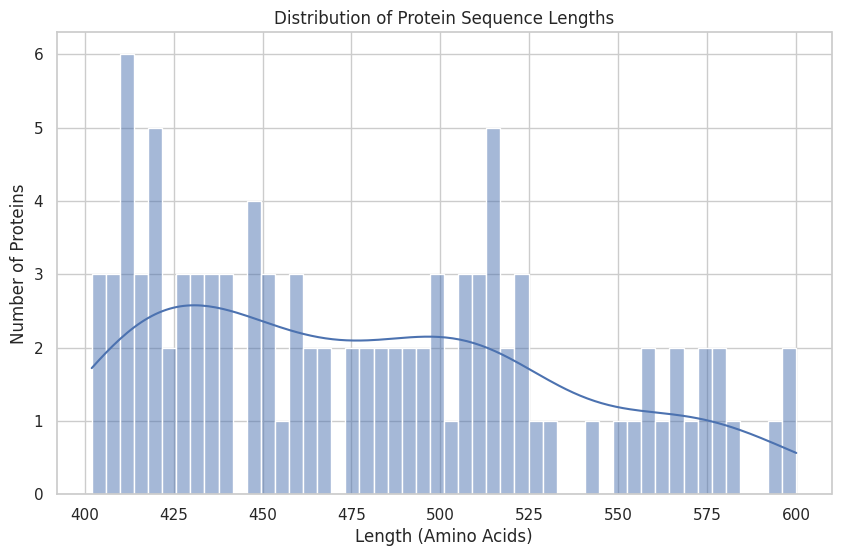

In [ ]:
# Plot the distribution of protein sequence lengths
sns.histplot(df['Length'], bins=50, kde=True)
plt.title("Distribution of Protein Sequence Lengths")
plt.xlabel("Length (Amino Acids)")
plt.ylabel("Number of Proteins")
plt.show()


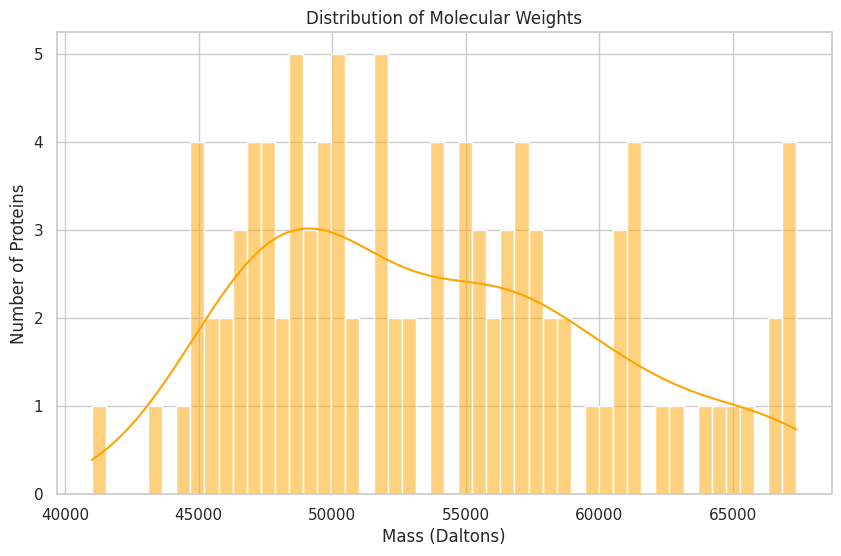

In [ ]:
# Plot the distribution of protein molecular masses
sns.histplot(df['Mass'], bins=50, kde=True, color='orange')
plt.title("Distribution of Molecular Weights")
plt.xlabel("Mass (Daltons)")
plt.ylabel("Number of Proteins")
plt.show()


/tmp/ipython-input-28-317337711.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locations.index, x=top_locations.values, palette="Blues_d")


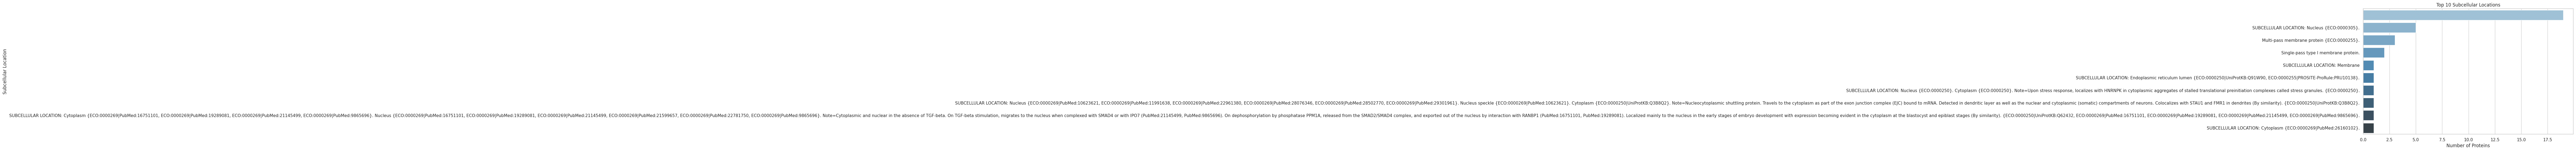

In [ ]:
#Top 10 Subcellular Locations

# Handle missing values
df['Subcellular location [CC]'] = df['Subcellular location [CC]'].fillna('')

# Split and explode subcellular locations
locations = df['Subcellular location [CC]'].str.split(';').explode().str.strip()

# Count the most frequent locations
top_locations = locations.value_counts().head(10)

# Plot the top 10 subcellular locations
sns.barplot(y=top_locations.index, x=top_locations.values, palette="Blues_d")
plt.title("Top 10 Subcellular Locations")
plt.xlabel("Number of Proteins")
plt.ylabel("Subcellular Location")
plt.show()


/tmp/ipython-input-29-2069681907.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_keywords.index, x=top_keywords.values, palette="viridis")


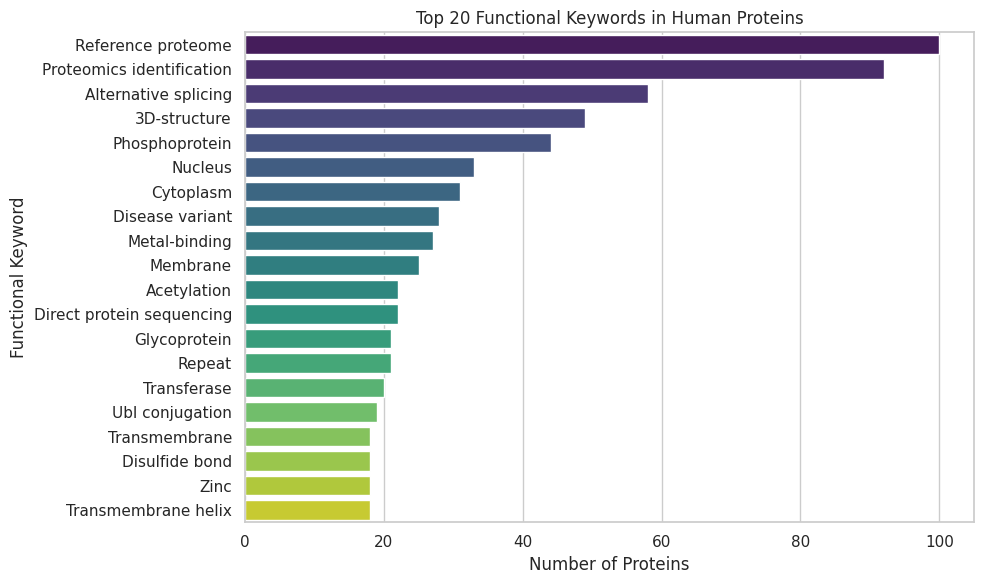

In [ ]:
#Top 20 Functional Keywords in Human Proteins

# Handle missing values
df['Keywords'] = df['Keywords'].fillna('')

# Split and explode keywords (each row may have multiple keywords separated by ';')
keywords = df['Keywords'].str.split(';').explode().str.strip()

# Count most frequent keywords
top_keywords = keywords.value_counts().head(20)

# Plot the top 20 keywords
sns.barplot(y=top_keywords.index, x=top_keywords.values, palette="viridis")
plt.title("Top 20 Functional Keywords in Human Proteins")
plt.xlabel("Number of Proteins")
plt.ylabel("Functional Keyword")
plt.tight_layout()
#plt.savefig("../figures/top_keywords.png", dpi=300)
plt.show()
